In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2,7,8.0,2,9,11,7.0,7,1.0,8.0,5.0,6,NaN
1,NaN,NaN,NaN,NaN,5,5,9.0,6,4,8,NaN,9,NaN,NaN,NaN,10,NaN
2,7.0,10.0,8.0,7.0,4,8,8.0,5,10,11,2.0,8,2.0,5.0,5.0,10,NaN
3,NaN,NaN,NaN,NaN,4,7,7.0,13,1,7,NaN,8,NaN,NaN,NaN,8,NaN
4,6.0,7.0,8.0,5.0,4,7,6.0,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,NaN,NaN,NaN,3,4,10.0,7,8,12,NaN,9,NaN,NaN,NaN,6,NaN
19996,NaN,NaN,NaN,NaN,3,7,8.0,2,10,12,NaN,8,NaN,NaN,NaN,8,NaN
19997,NaN,NaN,NaN,NaN,4,7,8.0,7,4,10,NaN,6,NaN,NaN,NaN,7,NaN
19998,4.0,11.0,4.0,8.0,3,0,2.0,4,6,1,0.0,7,0.0,8.0,0.0,8,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	8000
float64		column 2	8000
float64		column 3	8000
float64		column 4	8000
int64		column 5	0
int64		column 6	0
float64		column 7	500
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	7500
int64		column 12	0
float64		column 13	8000
float64		column 14	8000
float64		column 15	8000
int64		column 16	0
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,12000.000000,12000.000000,12000.000000,12000.000000,20000.000000,20000.000000,19500.000000,20000.000000,20000.000000,20000.000000,12500.000000,20000.000000,12000.000000,12000.000000,12000.000000,20000.00000,0.0
mean,4.013917,6.961167,5.148583,5.314417,3.505850,6.897600,7.506564,4.628600,5.178650,8.282050,6.550800,7.929000,3.134167,8.373583,3.728750,7.80120,NaN
std,1.869317,3.233656,1.950211,2.217574,2.190458,2.026035,2.319124,2.699968,2.380823,2.488475,2.530441,2.080619,2.333799,1.535757,2.533353,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

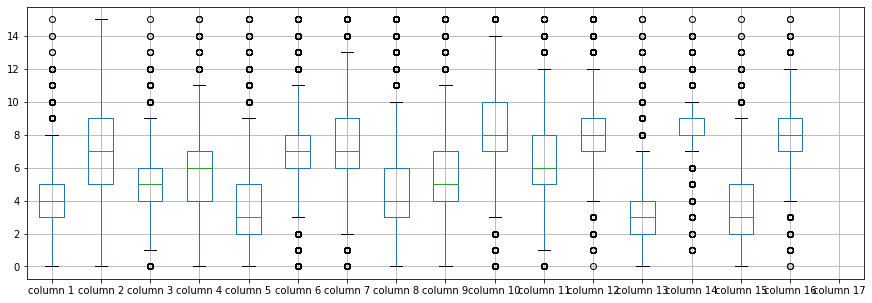

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.013917
column 2     6.961167
column 3     5.148583
column 4     5.314417
column 5     3.505850
column 6     6.897600
column 7     7.506564
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.550800
column 12    7.929000
column 13    3.134167
column 14    8.373583
column 15    3.728750
column 16    7.801200
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.756266,0.846012,0.670194,0.604873,-0.067940,0.041668,0.007578,0.008369,0.120172,0.034609,-0.058791,0.481147,0.101768,0.230405,-0.167157,NaN
column 2,0.756266,1.000000,0.669296,0.820012,0.551538,0.008228,-0.026972,-0.038340,0.047366,0.138526,-0.043286,-0.038236,0.274939,0.018109,0.194542,-0.096982,NaN
column 3,0.846012,0.669296,1.000000,0.652394,0.755393,0.028002,0.013271,-0.117977,0.023749,0.088819,0.007281,-0.053712,0.552802,0.044046,0.211087,-0.183916,NaN
column 4,0.670194,0.820012,0.652394,1.000000,0.644038,0.012249,-0.007763,0.061050,-0.008805,-0.013062,0.000283,-0.004930,0.269227,0.041001,0.267641,-0.076733,NaN
column 5,0.604873,0.551538,0.755393,0.644038,1.000000,0.139159,-0.029338,-0.011985,-0.065557,-0.069776,-0.089863,-0.038858,0.631750,0.005098,0.459689,-0.062969,NaN
column 6,-0.067940,0.008228,0.028002,0.012249,0.139159,1.000000,-0.358873,-0.053306,-0.122851,0.085963,-0.391890,-0.032115,0.128199,-0.256110,0.115877,0.248816,NaN
column 7,0.041668,-0.026972,0.013271,-0.007763,-0.029338,-0.358873,1.000000,-0.120158,-0.051357,0.175388,0.568274,-0.274409,-0.098406,0.548711,-0.130808,-0.209943,NaN
column 8,0.007578,-0.038340,-0.117977,0.061050,-0.011985,-0.053306,-0.120158,1.000000,-0.188431,-0.317780,0.034044,0.082020,0.153372,-0.084900,-0.006988,0.182902,NaN
column 9,0.008369,0.047366,0.023749,-0.008805,-0.065557,-0.122851,-0.051357,-0.188431,1.000000,0.132000,-0.047516,0.119048,-0.395264,-0.048972,0.242948,-0.061335,NaN
column 10,0.120172,0.138526,0.088819,-0.013062,-0.069776,0.085963,0.175388,-0.317780,0.132000,1.000000,0.020741,-0.106759,-0.222064,0.035576,-0.145289,-0.114223,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+22,17+22+22,17+22+22+22,17+22+22,17+22,17], vae_layer = False, seed = 220)
imputer.build_model(df)
imputer.train_model(training_epochs=10)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 60.20680548095703
Epoch: 1 , loss: 41.23081743774414
Epoch: 2 , loss: 37.757286724853515
Epoch: 3 , loss: 36.15731436767578
Epoch: 4 , loss: 35.132657762145996
Epoch: 5 , loss: 34.69659556732178
Epoch: 6 , loss: 34.414534294128416
Epoch: 7 , loss: 34.111124307250975
Epoch: 8 , loss: 33.95840288238525
Epoch: 9 , loss: 33.708055236816406
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    2.932749
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
1,-0.379467,-0.984056,-0.472765,-0.287641,0,0,0.0,0,0,0,-1.137164,0,0.665080,-1.529319,-3.798909,0,NaN
2,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
3,-1.041099,-3.740539,-1.172633,-2.906541,0,0,0.0,0,0,0,-1.309825,0,-0.691091,-1.812677,2.802308,0,NaN
4,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.515399,-4.353034,-0.528808,-3.455989,0,0,0.0,0,0,0,-4.554617,0,0.514652,-2.065925,1.173732,0,NaN
19996,-1.292507,-2.039145,-2.573241,-1.412569,0,0,0.0,0,0,0,-1.739957,0,0.979721,-3.379838,-3.439749,0,NaN
19997,-1.291770,-3.624732,-0.524110,-2.479954,0,0,0.0,0,0,0,-2.772621,0,-0.910624,-3.525145,-0.812843,0,NaN
19998,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0,0,0,0.000000,0,0.000000,0.000000,0.000000,0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

705.4510595994936

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.18893565770797804

In [19]:
new_df.iloc[66,:]

column 1      6.00000
column 2      9.00000
column 3     10.00000
column 4      7.00000
column 5     11.00000
column 6     10.00000
column 7      5.00000
column 8      3.00000
column 9      2.00000
column 10     9.00000
column 11     4.00000
column 12     8.00000
column 13    11.00000
column 14     6.00000
column 15     4.00000
column 16     7.00000
column 17     1.45068
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.000000,4.000000,4.000000,3.000000,2,7,8.0,2,9,11,7.000000,7,1.000000,8.000000,5.000000,6,-0.238523
1,3.620533,6.015944,4.527235,4.712359,5,5,9.0,6,4,8,5.862836,9,2.665080,7.470681,3.201091,10,2.243675
2,7.000000,10.000000,8.000000,7.000000,4,8,8.0,5,10,11,2.000000,8,2.000000,5.000000,5.000000,10,0.845488
3,2.958901,5.259461,3.827367,4.093459,4,7,7.0,13,1,7,4.690175,8,2.308909,6.187323,2.802308,8,0.945361
4,6.000000,7.000000,8.000000,5.000000,4,7,6.0,3,7,10,7.000000,9,3.000000,8.000000,3.000000,7,1.109683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.484601,5.646966,4.471192,4.544011,3,4,10.0,7,8,12,5.445383,9,2.514652,6.934075,3.173732,6,1.102775
19996,2.707493,4.960855,3.426759,3.587431,3,7,8.0,2,10,12,4.260043,8,1.979721,5.620162,2.560251,8,0.620457
19997,2.708230,4.375268,3.475890,3.520046,4,7,8.0,7,4,10,4.227379,6,2.089376,5.474855,2.187157,7,1.336863
19998,4.000000,11.000000,4.000000,8.000000,3,0,2.0,4,6,1,0.000000,7,0.000000,8.000000,0.000000,8,1.165821


In [21]:
imputations[-1].to_excel("Letter_AL_1(imp).xlsx", index=False, header=False)